In [1]:
%pylab inline
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import scipy as sp
import glob
from mpl_toolkits.mplot3d import Axes3D

pylab.rcParams['figure.figsize'] = (22.0, 11.0)

Populating the interactive namespace from numpy and matplotlib


# Load observations

In [2]:
obs = pd.read_csv('/RHESSys/Comocreek/barnhatb/obs/como_discharge_real_clean.csv', sep=',', header='infer')
obs.index = pd.date_range(start='2004-01-01',freq='D', periods = len(obs.q_liter_per_day))
obs = obs.drop(['year','doy'], axis = 1)

## Convert Observed Streamflow to L/d to mm/d

In [3]:
area = 5.15*(1000.*1000.) # m^2 area upstream of the gauge
streamflow = obs.q_liter_per_day
streamflow = streamflow*0.001 # convert to m3/d
streamflow = streamflow/area # covert to m/d
obs['discharge'] = streamflow*1000. # convert to mm/d
del streamflow

In [4]:
obs2 = obs.groupby(lambda x: x.year).sum() # generate yearly sums

obstrain = obs2.discharge[[2004,2005,2007,2009,2011]] # pull out the training years of observations

## Plot Observations

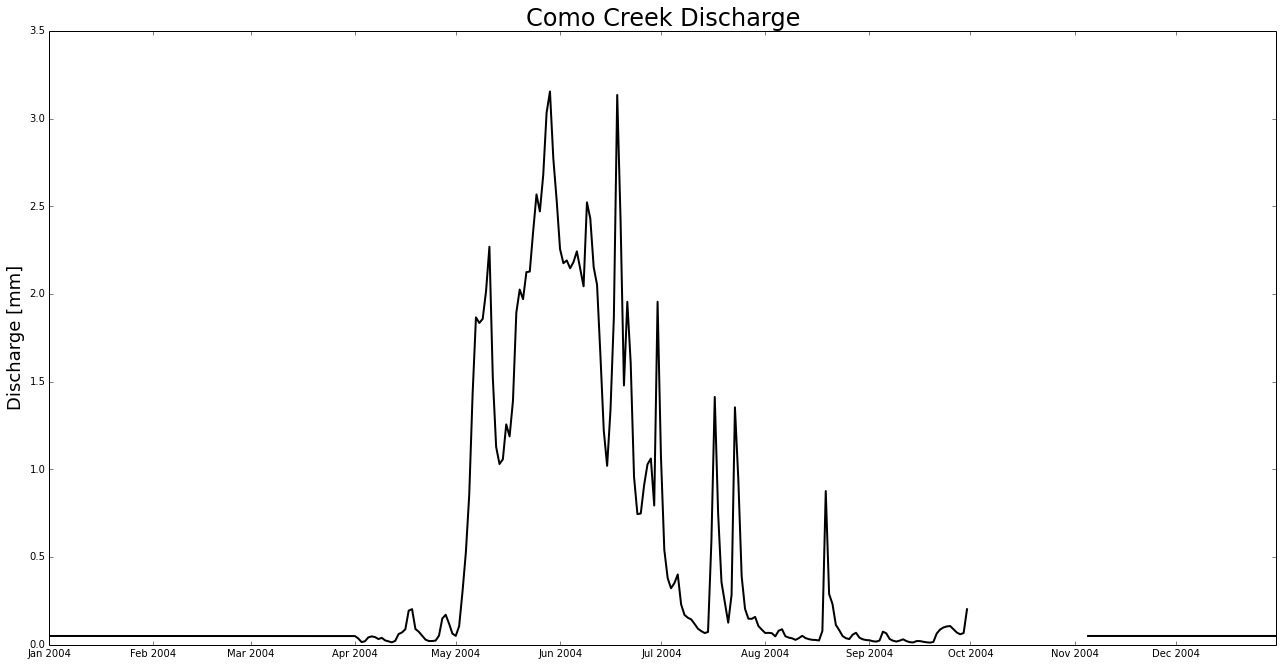

In [5]:
plt.plot(obs['2004-01-01':'2004-12-31'].index, obs['2004-01-01':'2004-12-31'].discharge, 'k', lw = 2)
plt.ylabel('Discharge [mm]', fontsize = 18)
plt.title('Como Creek Discharge', fontsize = 24)

# GW1 Sensitivity

## Load Simulations

In [6]:
prefix = 'sens1_gw1_'

In [7]:
gw1 = np.load('/RHESSys/Comocreek/barnhatb/out/cal/sens1_gw1.npy') # hmmm, this only has 3 values

In [8]:
# generate the gw values again
gw1 = np.array(range(10,300,40))
gw1 = gw1/1000.0

In [9]:
path = '/RHESSys/Comocreek1/barnhatb/out/SENS/'+prefix
files = glob.glob(path+'*'+'_basin.daily')
n=len(files)
files

['/RHESSys/Comocreek1/barnhatb/out/SENS/sens1_gw1_0_basin.daily',
 '/RHESSys/Comocreek1/barnhatb/out/SENS/sens1_gw1_1_basin.daily',
 '/RHESSys/Comocreek1/barnhatb/out/SENS/sens1_gw1_2_basin.daily',
 '/RHESSys/Comocreek1/barnhatb/out/SENS/sens1_gw1_3_basin.daily',
 '/RHESSys/Comocreek1/barnhatb/out/SENS/sens1_gw1_4_basin.daily',
 '/RHESSys/Comocreek1/barnhatb/out/SENS/sens1_gw1_5_basin.daily',
 '/RHESSys/Comocreek1/barnhatb/out/SENS/sens1_gw1_6_basin.daily',
 '/RHESSys/Comocreek1/barnhatb/out/SENS/sens1_gw1_7_basin.daily']

In [10]:
dat = pd.read_table(files[0],delim_whitespace=True,
                       header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
m=len(dat)
del dat

In [11]:
gw1sims = pd.DataFrame()# preallocate

In [12]:
ct = 0 # start a counter
for fl in files:
    data = pd.read_table(fl,delim_whitespace=True,
                       header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
    gw1sims[str(ct)] = data.streamflow
    #print ct
    ct += 1
    del data

# GW2 Sensitivity

## Load Simulations

In [13]:
prefix = 'sens2_gw2_'

In [14]:
gw2 = np.load('/RHESSys/Comocreek/barnhatb/out/cal/sens2_gw2.npy') # hmmm, this only has 3 values

In [15]:
# generate the GW1 values

start=10
end=900

gw2 = np.array(range(start,end,120))
gw2 = gw2/1000.

In [16]:
path = '/RHESSys/Comocreek2/barnhatb/out/SENS/'+prefix
files = glob.glob(path+'*'+'_basin.daily')
n=len(files)
files

['/RHESSys/Comocreek2/barnhatb/out/SENS/sens2_gw2_0_basin.daily',
 '/RHESSys/Comocreek2/barnhatb/out/SENS/sens2_gw2_1_basin.daily',
 '/RHESSys/Comocreek2/barnhatb/out/SENS/sens2_gw2_2_basin.daily',
 '/RHESSys/Comocreek2/barnhatb/out/SENS/sens2_gw2_3_basin.daily',
 '/RHESSys/Comocreek2/barnhatb/out/SENS/sens2_gw2_4_basin.daily',
 '/RHESSys/Comocreek2/barnhatb/out/SENS/sens2_gw2_5_basin.daily',
 '/RHESSys/Comocreek2/barnhatb/out/SENS/sens2_gw2_6_basin.daily',
 '/RHESSys/Comocreek2/barnhatb/out/SENS/sens2_gw2_7_basin.daily']

In [17]:
dat = pd.read_table(files[0],delim_whitespace=True,
                       header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
m=len(dat)
del dat

In [18]:
gw2sims = pd.DataFrame()# preallocate

In [19]:
ct = 0 # start a counter
for fl in files:
    data = pd.read_table(fl,delim_whitespace=True,
                       header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
    gw2sims[str(ct)] = data.streamflow
    #print ct
    ct += 1
    del data

# m Sensitivity

## Load the Simulations

In [20]:
prefix = 'sens3_m_'
mm = np.load('/RHESSys/Comocreek/barnhatb/out/cal/sens3_m_m.npy') # hmmm, this only has 3 values

In [21]:
path = '/RHESSys/Comocreek3/barnhatb/out/SENS/'+prefix
files = glob.glob(path+'*'+'_basin.daily')
n=len(files)
files

['/RHESSys/Comocreek3/barnhatb/out/SENS/sens3_m_0_basin.daily',
 '/RHESSys/Comocreek3/barnhatb/out/SENS/sens3_m_1_basin.daily',
 '/RHESSys/Comocreek3/barnhatb/out/SENS/sens3_m_2_basin.daily',
 '/RHESSys/Comocreek3/barnhatb/out/SENS/sens3_m_3_basin.daily',
 '/RHESSys/Comocreek3/barnhatb/out/SENS/sens3_m_4_basin.daily',
 '/RHESSys/Comocreek3/barnhatb/out/SENS/sens3_m_5_basin.daily',
 '/RHESSys/Comocreek3/barnhatb/out/SENS/sens3_m_6_basin.daily',
 '/RHESSys/Comocreek3/barnhatb/out/SENS/sens3_m_7_basin.daily']

In [22]:
dat = pd.read_table(files[0],delim_whitespace=True,
                       header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
m=len(dat)
del dat

msims = pd.DataFrame()# preallocate

ct = 0 # start a counter
for fl in files:
    data = pd.read_table(fl,delim_whitespace=True,
                       header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
    msims[str(ct)] = data.streamflow
    #print ct
    ct += 1
    del data

# Ksat Sensitivity

## Load the Simulations

In [23]:
prefix = 'sens4_ksat_'
ksat = np.load('/RHESSys/Comocreek/barnhatb/out/cal/sens4_ksat_ksat.npy') # hmmm, this only has 3 values

In [24]:
path = '/RHESSys/Comocreek4/barnhatb/out/SENS/'+prefix
files = glob.glob(path+'*'+'_basin.daily')
n=len(files)
files

['/RHESSys/Comocreek4/barnhatb/out/SENS/sens4_ksat_0_basin.daily',
 '/RHESSys/Comocreek4/barnhatb/out/SENS/sens4_ksat_1_basin.daily',
 '/RHESSys/Comocreek4/barnhatb/out/SENS/sens4_ksat_2_basin.daily',
 '/RHESSys/Comocreek4/barnhatb/out/SENS/sens4_ksat_3_basin.daily',
 '/RHESSys/Comocreek4/barnhatb/out/SENS/sens4_ksat_4_basin.daily',
 '/RHESSys/Comocreek4/barnhatb/out/SENS/sens4_ksat_5_basin.daily',
 '/RHESSys/Comocreek4/barnhatb/out/SENS/sens4_ksat_6_basin.daily',
 '/RHESSys/Comocreek4/barnhatb/out/SENS/sens4_ksat_7_basin.daily']

In [25]:
dat = pd.read_table(files[0],delim_whitespace=True,
                       header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
m=len(dat)
del dat

ksatsims = pd.DataFrame()# preallocate

ct = 0 # start a counter
for fl in files:
    data = pd.read_table(fl,delim_whitespace=True,
                       header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
    ksatsims[str(ct)] = data.streamflow
    #print ct
    ct += 1
    del data

# Plots

**Breakdown of what each parameter is supposed to do:**

- GW1: Bypass flow, water becomes unavailable for ET

- GW2: Rate of lateral flow from hillslope groundwater to the stream

- Ksat: Hydraulic conductivity at the surface

- m: Decay rate of Ksat

## GW1

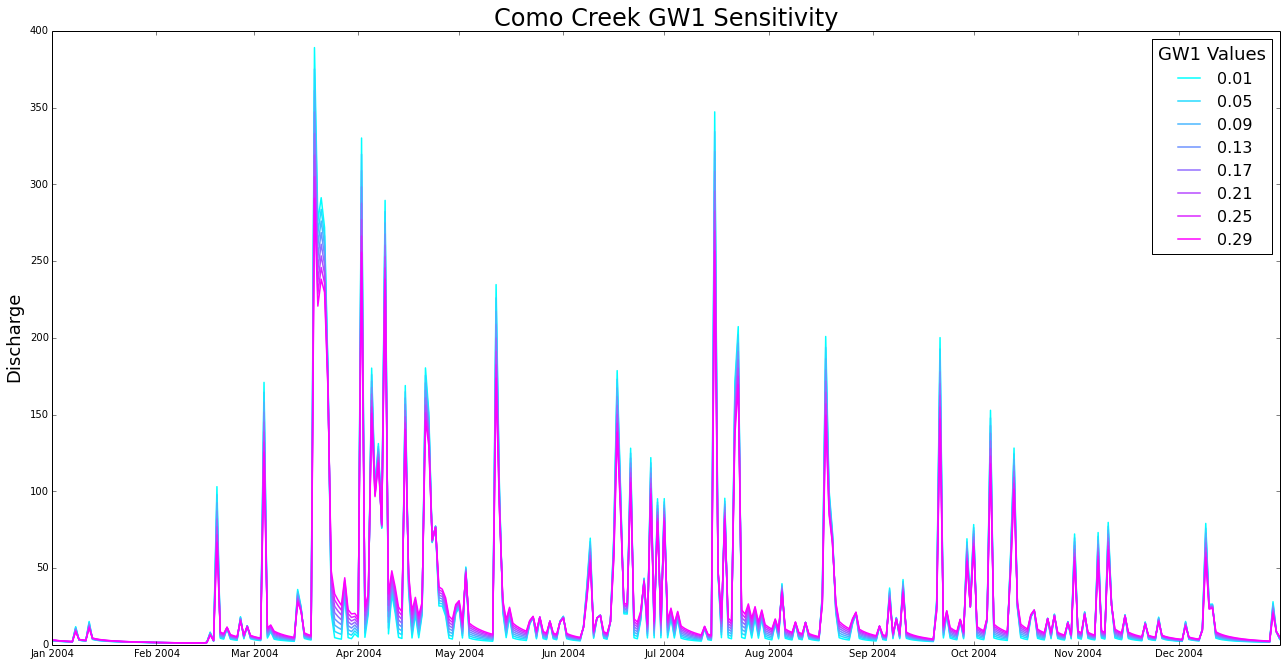

In [26]:
strt = '2004-01-01'
nd = '2004-12-31'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(gw1sims[strt:nd].index, gw1sims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(gw1, title='GW1 Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek GW1 Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

GW1 Annual

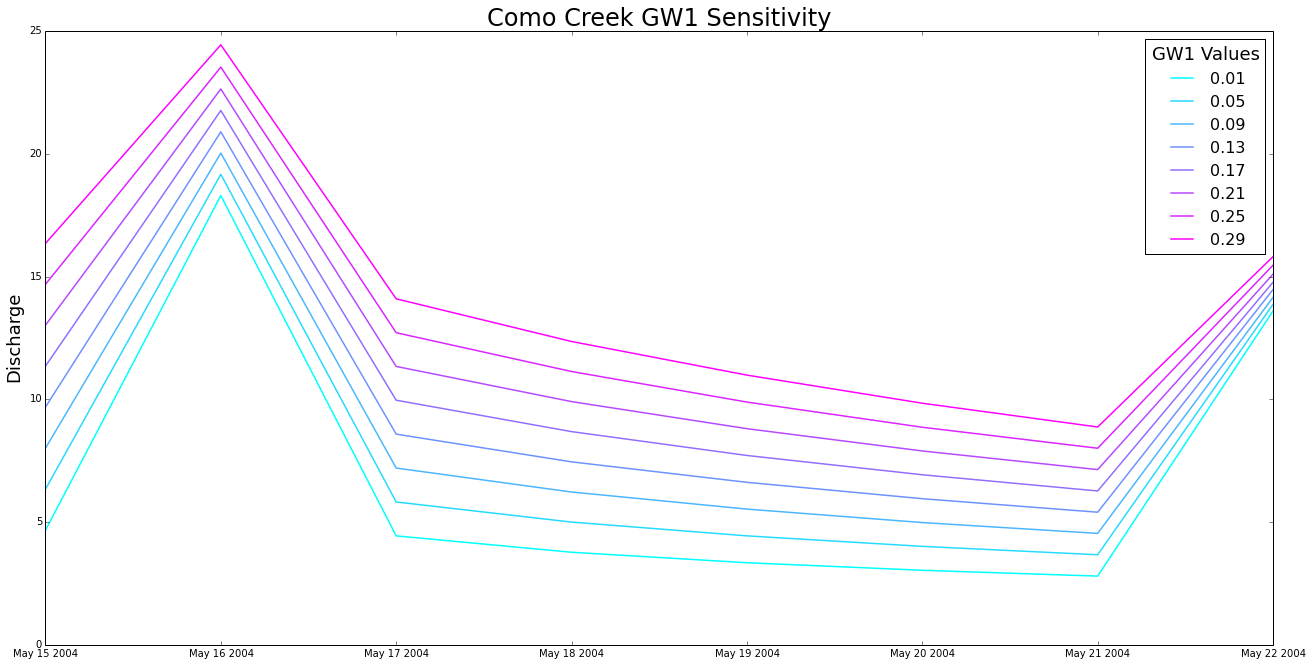

In [27]:
strt = '2004-05-15'
nd = '2004-05-22'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(gw1sims[strt:nd].index, gw1sims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(gw1, title='GW1 Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek GW1 Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**GW1 Baseflow Detail:** Progressively higher GW1 values cause higher baseflow.

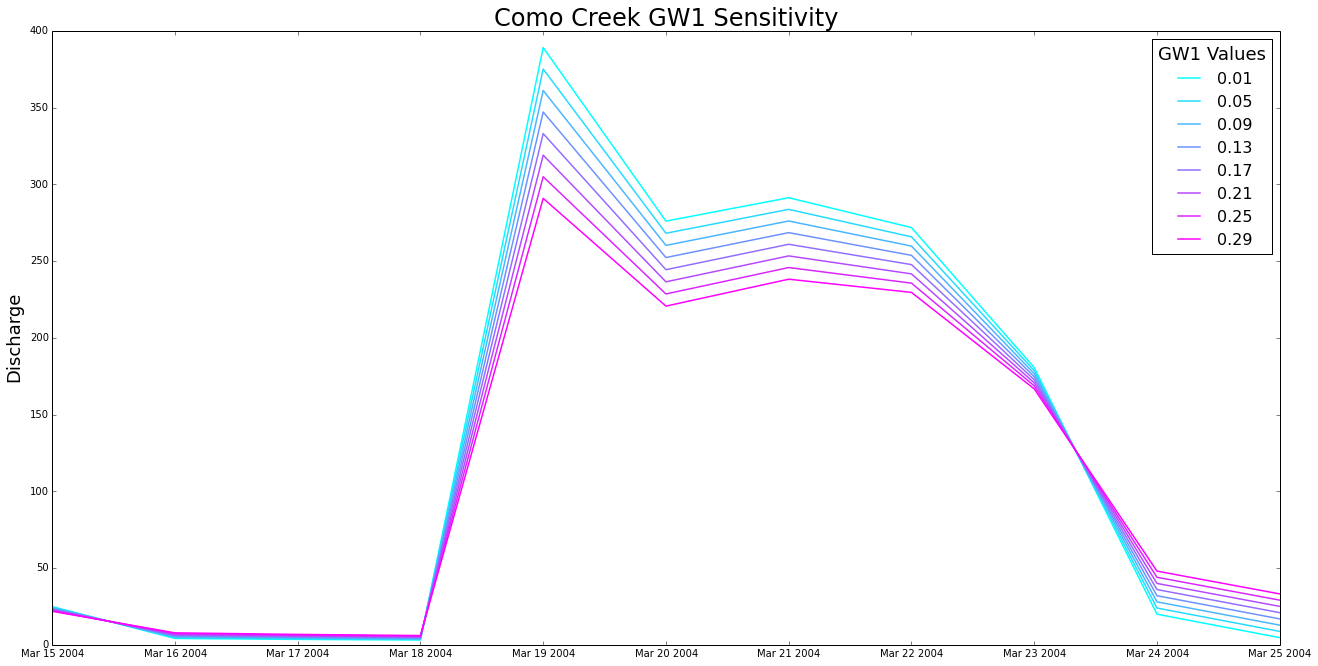

In [28]:
strt = '2004-03-15'
nd = '2004-03-25'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(gw1sims[strt:nd].index, gw1sims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(gw1, title='GW1 Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek GW1 Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**GW1 Peak Flow Detail:** Progressively higher GW1 values cause lower peak flows.

## GW2

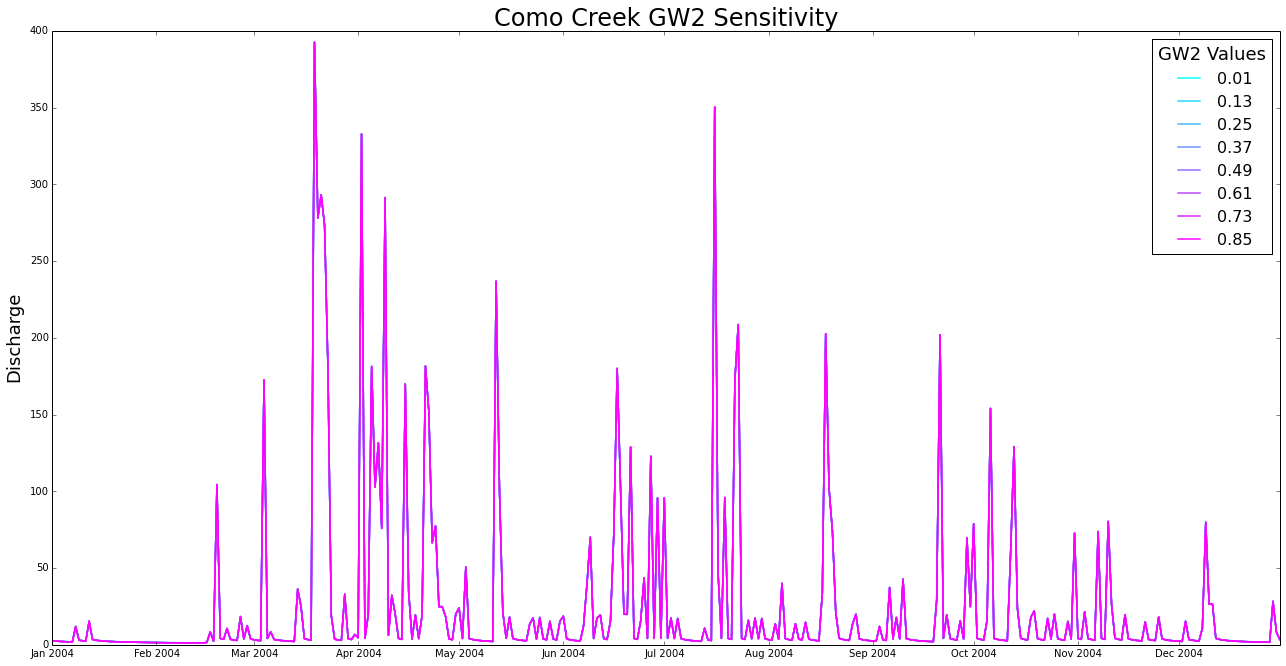

In [29]:
strt = '2004-01-01'
nd = '2004-12-31'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(gw2sims[strt:nd].index, gw2sims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(gw2, title='GW2 Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek GW2 Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**GW2 Annual:**

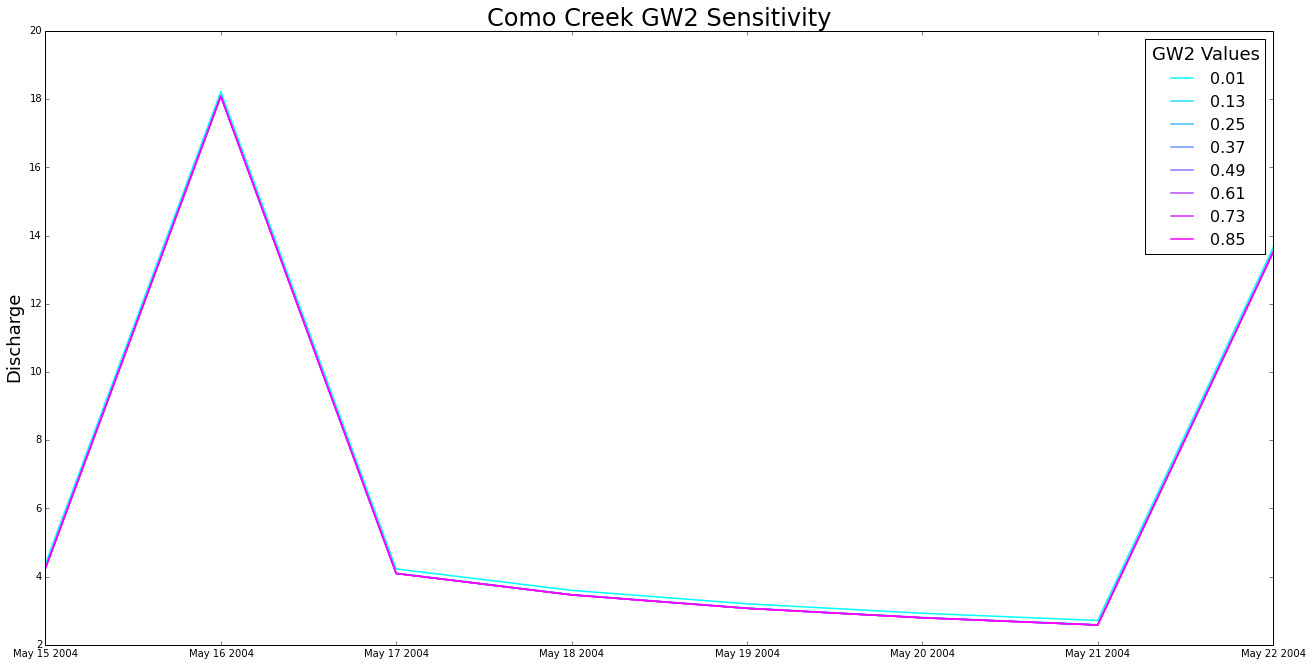

In [30]:
strt = '2004-05-15'
nd = '2004-05-22'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(gw2sims[strt:nd].index, gw2sims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(gw2, title='GW2 Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek GW2 Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**GW2 Baseflow Detail:** Low GW2 values cause slightly higher baseflow.

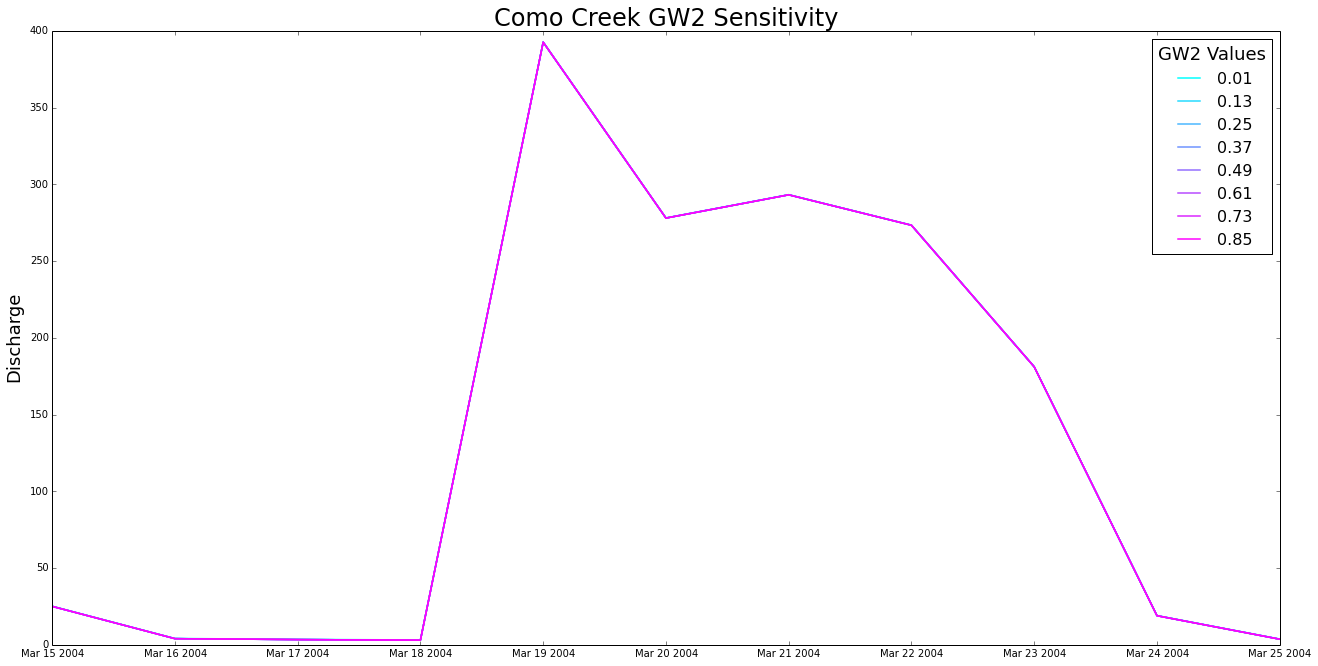

In [31]:
strt = '2004-03-15'
nd = '2004-03-25'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(gw2sims[strt:nd].index, gw2sims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(gw2, title='GW2 Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek GW2 Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**GW2 Peak Flow Detail:** Peak flow appears insensitive to changes in GW2. Lets dig a little deeper into this below.

In [32]:
gw2sims.describe()

,0,1,2,3,4,5,6,7
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,25.548018,25.430681,25.421588,25.420867,25.420769,25.420746,25.420737,25.420732
std,56.942152,56.940949,56.940958,56.940989,56.940995,56.940996,56.940996,56.940996
min,1.325075,1.198690,1.178518,1.176622,1.176366,1.176310,1.176291,1.176281
25%,2.886574,2.770201,2.766092,2.765892,2.765865,2.765856,2.765852,2.765849
50%,3.879415,3.762737,3.756824,3.756478,3.756434,3.756422,3.756416,3.756413
75%,17.960676,17.845496,17.840555,17.840288,17.840254,17.840243,17.840238,17.840235
max,392.842381,392.715988,392.701166,392.699963,392.699810,392.699775,392.699761,392.699754


Looks like these simulations are only slightly different.

## m

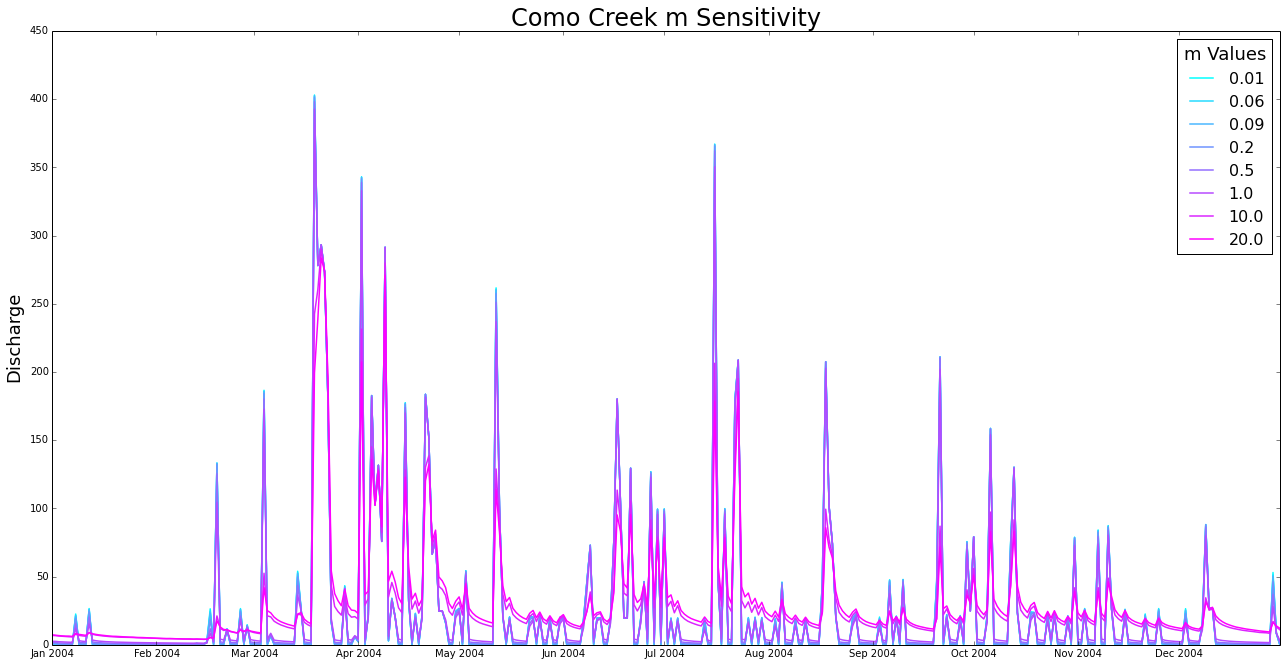

In [33]:
strt = '2004-01-01'
nd = '2004-12-31'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(msims[strt:nd].index, msims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(mm, title='m Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek m Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**m Annual:**

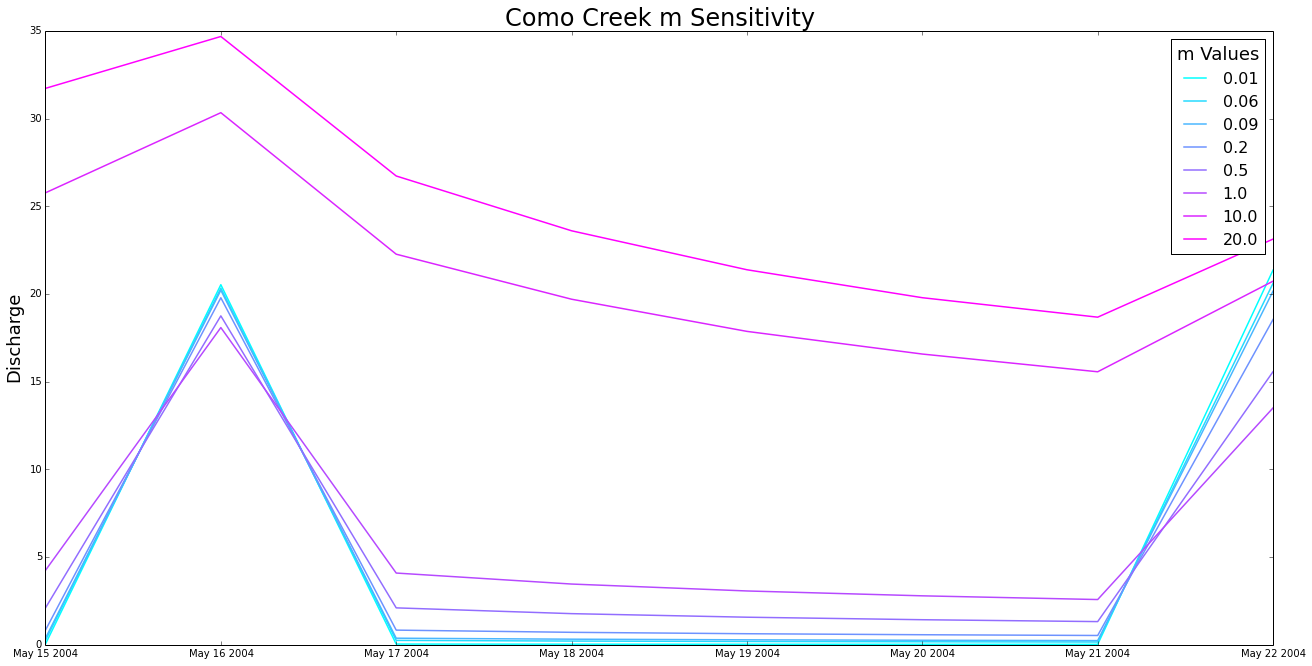

In [34]:
strt = '2004-05-15'
nd = '2004-05-22'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(msims[strt:nd].index, msims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(mm, title='m Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek m Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**m Baseflow Detail:** Progressively higher m values increase baseflow.

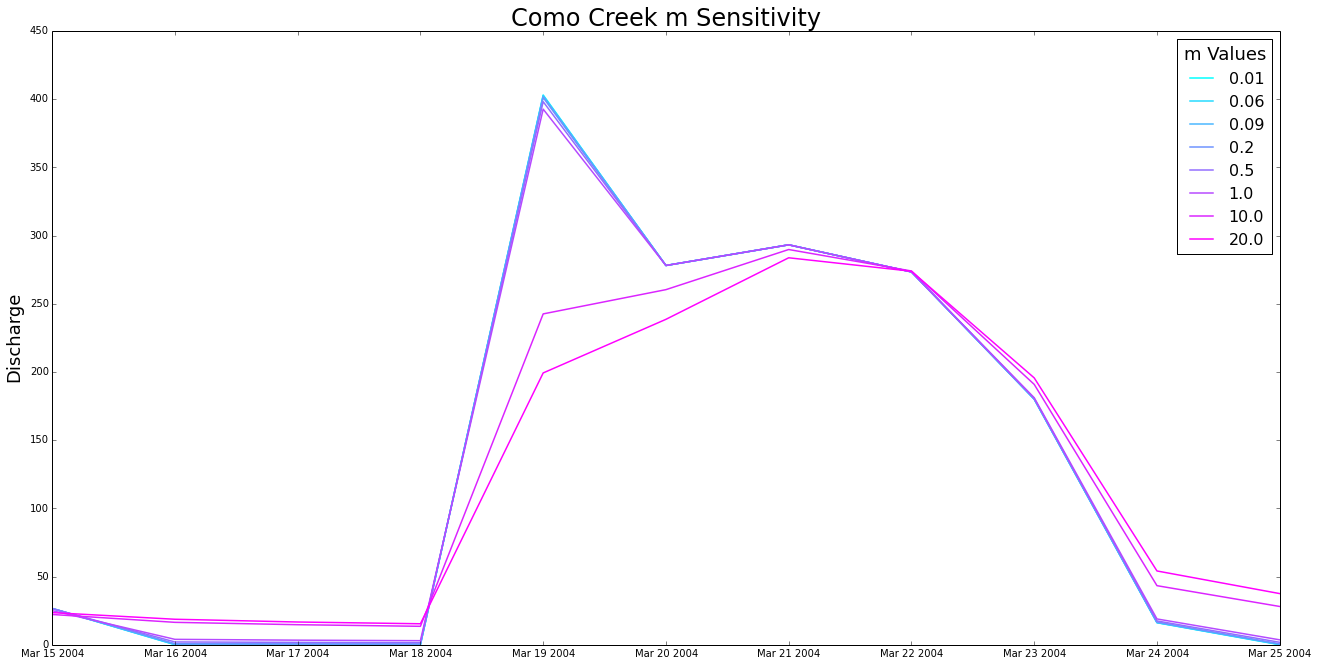

In [35]:
strt = '2004-03-15'
nd = '2004-03-25'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(msims[strt:nd].index, msims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(mm, title='m Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek m Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**m Peak Flow Detail:** Progressively higher m values decrease peak flow.

## Ksat

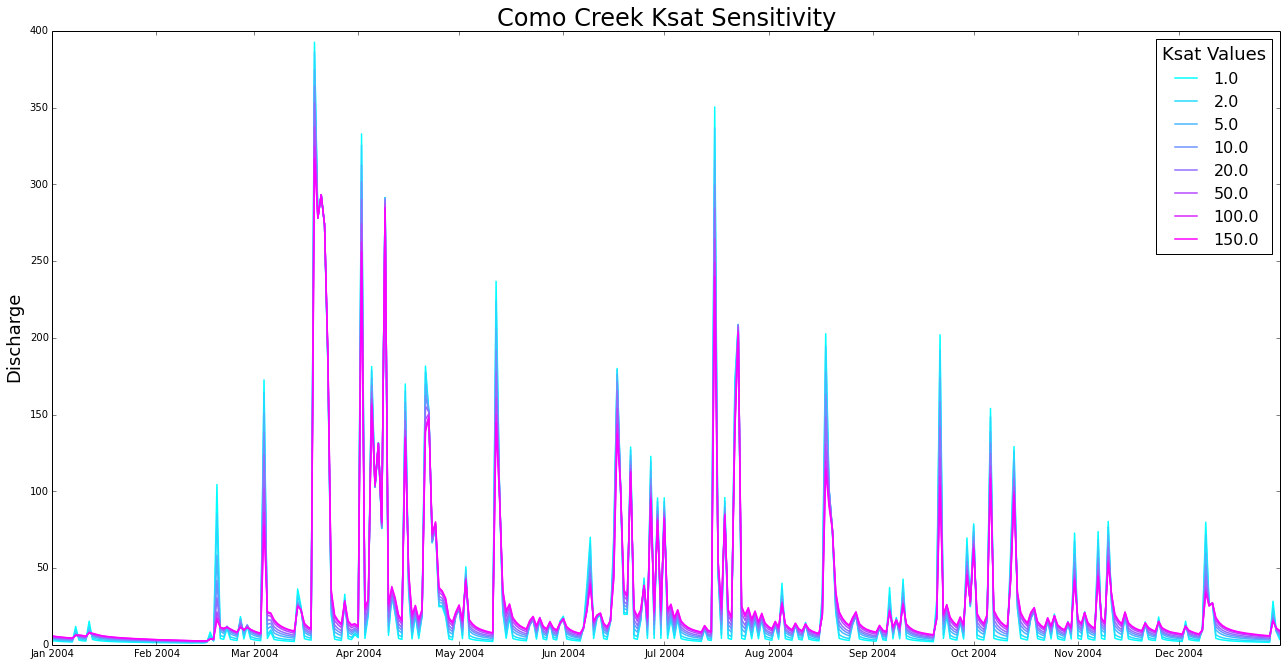

In [36]:
strt = '2004-01-01'
nd = '2004-12-31'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(ksatsims[strt:nd].index, ksatsims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(ksat, title='Ksat Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek Ksat Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**Ksat Annual:**

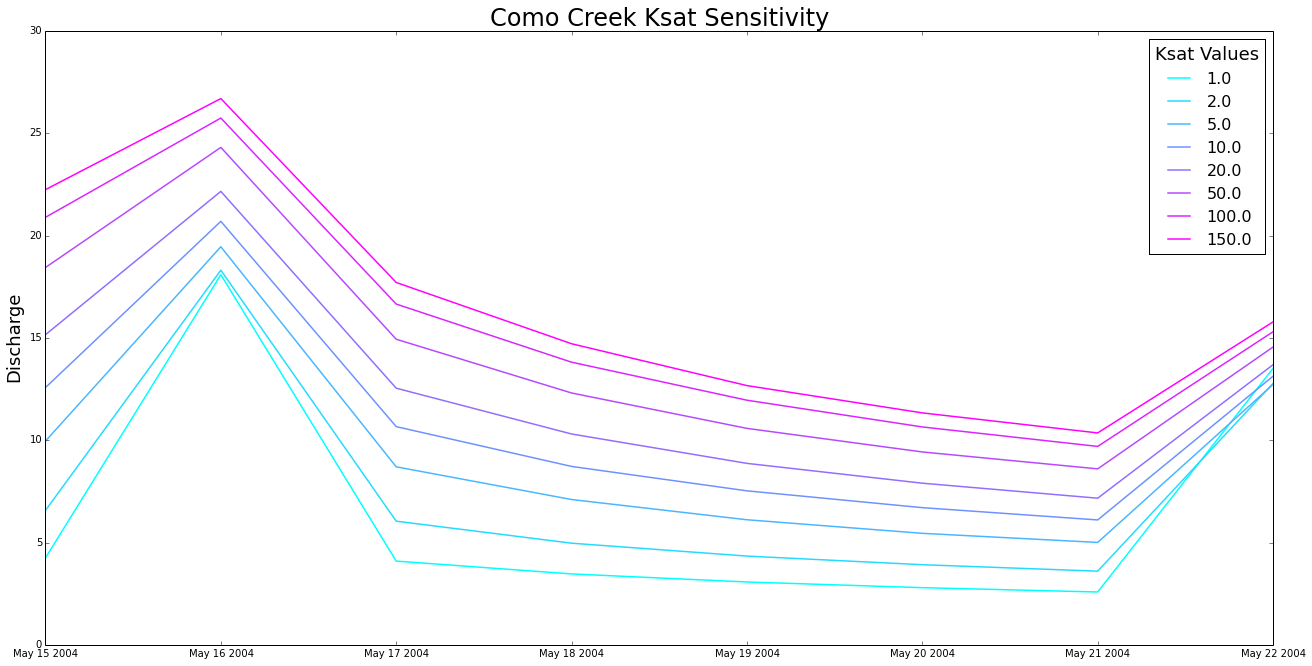

In [37]:
strt = '2004-05-15'
nd = '2004-05-22'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(ksatsims[strt:nd].index, ksatsims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(ksat, title='Ksat Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek Ksat Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**Ksat Baseflow Detail:** Progressively higher Ksat values increase baseflow.

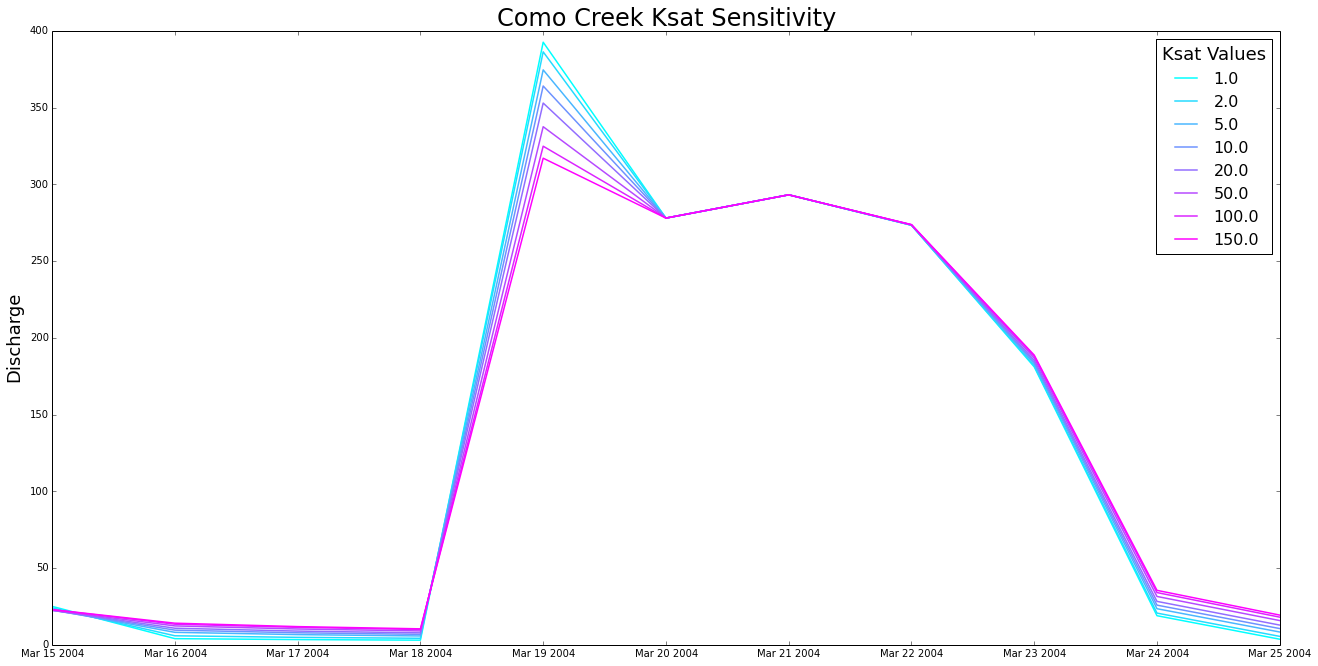

In [38]:
strt = '2004-03-15'
nd = '2004-03-25'

colors = plt.get_cmap('cool')(np.linspace(0,1.0,n))

for i in xrange(0,n):
    plt.plot(ksatsims[strt:nd].index, ksatsims.loc[strt:nd,str(i)], lw = 1.5, c = colors[i,:])

leg = plt.legend(ksat, title='Ksat Values', fontsize = 16)
plt.setp(leg.get_title(),fontsize=18)
plt.title('Como Creek Ksat Sensitivity', fontsize = 24)
plt.ylabel('Discharge', fontsize = 18);

**Ksat Peak Flow Detail:** Progressively higher Ksat values decrease peak flow.